# Daten: Einlesen, Bereinigen & Visualisieren

## Das Gelernte anwenden.

Um nun die Erkenntnisse aus den bisherigen Workshopinhalten zu festigen, werden wir uns mit einem vollständig neuen Datensatz beschäftigen. Im konkreten Fall möchten wir es versuchen, mit dem gelernten Handwerkszeug ([Python 3.9.6](https://www.python.org/downloads/release/python-396/), [pandas](https://pandas.pydata.org/docs/) & [seaborn](https://seaborn.pydata.org/)) die 120-jährige Geschichte der modernen olympischen Spiele zu analysieren.

Die entsprechenden Informationen sind in zwei Dateien, `athlete_events.csv` sowie `noc_regions.csv`, abgelegt.
In den nachfolgenden beiden Tabellen sind die darin beschriebenen Spalten und die dazugehörige Spaltenbeschreibung einzusehen.

<table>
  <tr>
      <td colspan="2"><center><strong>athlete_events.csv</strong></center></td>
  </tr>
  <tr>
    <td><strong>Spalte</strong></td>
    <td><strong>Beschreibung</strong></td>
  </tr>
  <tr>
    <td>ID</td>
    <td>Einzigartige Identifikationsnummer für jede Athletin</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name einer Athletin</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Geschlecht (codiert als M oder F)</td>
  </tr>
  <tr>
    <td>Alter</td>
    <td>Integer</td>
  </tr>
  <tr>
    <td>Height</td>
    <td>in cm</td>
  </tr>
  <tr>
    <td>Weight</td>
    <td>in kg</td>
  </tr>
  <tr>
    <td>Team</td>
    <td>Name des Teams</td>
  </tr>
  <tr>
    <td>NOC</td>
    <td>Buchstabencode für das nationale olympische Committee der Athletin</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Integer</td>
  </tr>
  <tr>
    <td>Season</td>
    <td>Codiert als Summer oder Winter</td>
  </tr>
  <tr>
    <td>City</td>
    <td>Austragungsort</td>
  </tr>
  <tr>
    <td>Sport</td>
    <td>Sportart</td>
  </tr>
  <tr>
    <td>Event</td>
    <td>Bewerbsbeschreibung innerhalb der Sportart</td>
  </tr>
  <tr>
    <td>Medal</td>
    <td>Gold, Silver, Bronze oder NA (wenn Athletin keine Medaille gemacht hat in diesem Bewerb)</td>
  </tr>
</table>

<hr>

<table>
  <tr>
      <td colspan="2"><center><strong>noc_regions.csv</strong></center></td>
  </tr>
  <tr>
    <td><strong>Spalte</strong></td>
    <td><strong>Beschreibung</strong></td>
  </tr>
  <tr>
    <td>NOC</td>
    <td>Buchstabencode für das nationale olympische Committee der Athletin</td>
  </tr>
  <tr>
    <td>Region</td>
    <td>Länderbezeichnung</td>
  </tr>
  <tr>
    <td>Notes</td>
    <td>zusätzliche Informationen</td>
  </tr>
</table>

### Aufgabe 0:
Nachdem wir uns mit den Spaltenbeschreibungen vertraut gemacht haben, lesen wir `athlete_events.csv` und `noc_regions.csv` per pandas in unser Notebook ein.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
df_athletes = pd.read_csv('../resources/data/athlete_events.csv')
df_regions = pd.read_csv('../resources/data/noc_regions.csv')

In [4]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df_athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df_athletes.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


Alle folgenden Aufgaben können entweder mittels darstellen des gewünschten Ergebnisses in Form des DataFrames oder über das Generieren einer entsprechenden Abbildung gelöst werden.

### Aufgabe 1:
Wieviele einzigartige Athletinnen sind aufgezeichnet?

Bonusplot: Wieviele einzigartige Athletinnen aus einem beliebigen Land sind pro Jahr eingetragen?

In [7]:
df_athletes.drop_duplicates(subset=['ID']).groupby(['Sex']).size()

Sex
F     33981
M    101590
dtype: int64

In [8]:
# count of unique athletes from austria over years as plot
austrian_entries = df_athletes[df_athletes['NOC'] == 'AUT']

austrian_entries

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
1740,968,"Margarete ""Grete"" Adler",F,28.0,NaN,NaN,Austria,AUT,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Plain High,NaN
1901,1048,Eduard Aellig,M,24.0,181.0,93.0,Austria,AUT,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Half-Heavyweight,NaN
2142,1190,Simon Agoston,M,31.0,179.0,64.0,Austria,AUT,2008 Summer,2008,Summer,Beijing,Triathlon,Triathlon Men's Olympic Distance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270900,135475,Liliana Teresa Zurowski,F,36.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
271005,135517,Fritz Zwazl,M,22.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Backstroke,NaN
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
271039,135540,David Zwilling,M,22.0,174.0,68.0,Austria,AUT,1972 Winter,1972,Winter,Sapporo,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN


In [9]:
austrian_entries = austrian_entries.drop_duplicates(subset=['ID', 'Year'])
austrian_entries

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN
1740,968,"Margarete ""Grete"" Adler",F,28.0,NaN,NaN,Austria,AUT,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Plain High,NaN
1901,1048,Eduard Aellig,M,24.0,181.0,93.0,Austria,AUT,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Half-Heavyweight,NaN
2142,1190,Simon Agoston,M,31.0,179.0,64.0,Austria,AUT,2008 Summer,2008,Summer,Beijing,Triathlon,Triathlon Men's Olympic Distance,NaN
2637,1480,Franz Aigner,M,32.0,NaN,107.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Heavyweight,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270713,135383,Annelore Zckert (-Zrost),F,22.0,NaN,NaN,Austria,AUT,1948 Winter,1948,Winter,Sankt Moritz,Alpine Skiing,Alpine Skiing Women's Downhill,NaN
270900,135475,Liliana Teresa Zurowski,F,36.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
271005,135517,Fritz Zwazl,M,22.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Backstroke,NaN
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver


In [10]:
sorted(austrian_entries['Year'].unique())

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

<IPython.core.display.Javascript object>


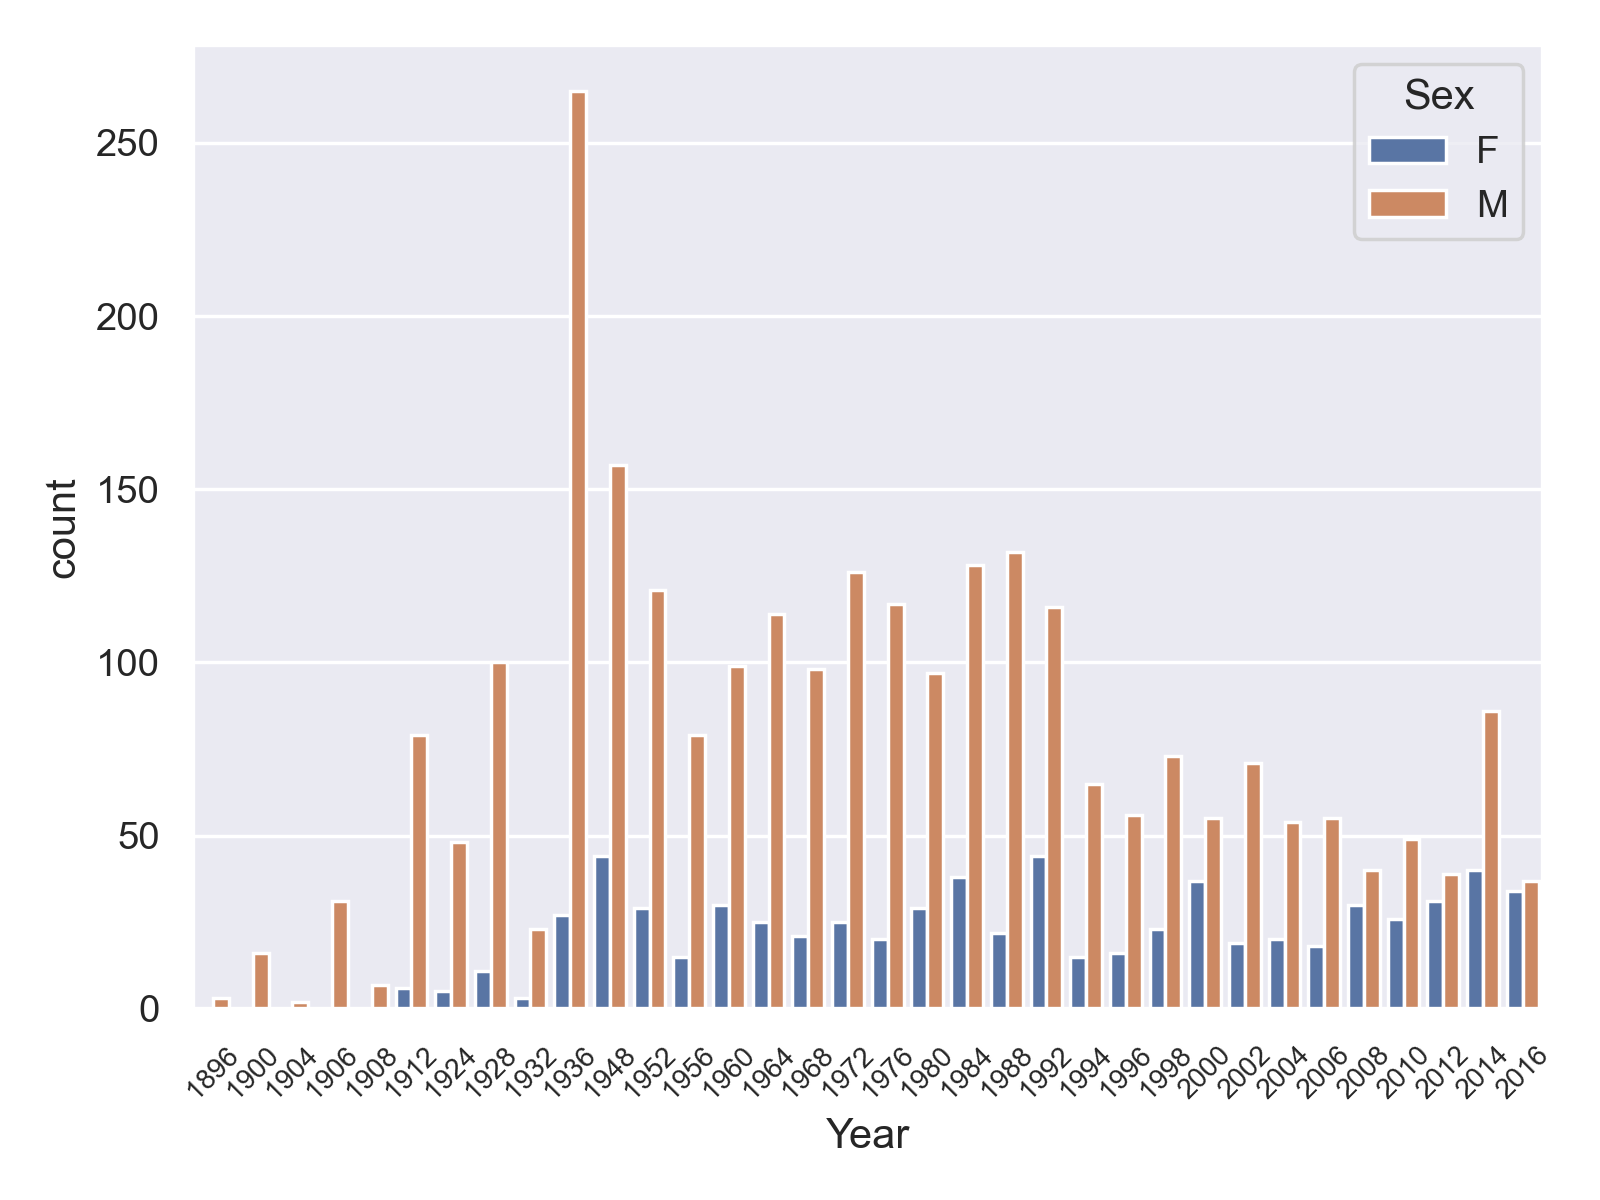

In [11]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=8, rotation=45)
sns.countplot(x="Year", data=austrian_entries, hue='Sex')
plt.tight_layout()

### Aufgabe 2:
Wie hoch ist die Anzahl unterschiedlicher Sportarten?

Bonusplot: An welchen Sportarten nahmen über die Jahre die meisten Athletinnen teil?

In [12]:
display(df_athletes['Sport'].unique())

len(df_athletes['Sport'].unique())

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

66

In [13]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
df_athletes['Sport'].value_counts()[:20].index

Index(['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Fencing',
       'Rowing', 'Cross Country Skiing', 'Alpine Skiing', 'Wrestling',
       'Football', 'Sailing', 'Equestrianism', 'Canoeing', 'Boxing',
       'Speed Skating', 'Ice Hockey', 'Hockey', 'Biathlon', 'Basketball'],
      dtype='object')

<IPython.core.display.Javascript object>


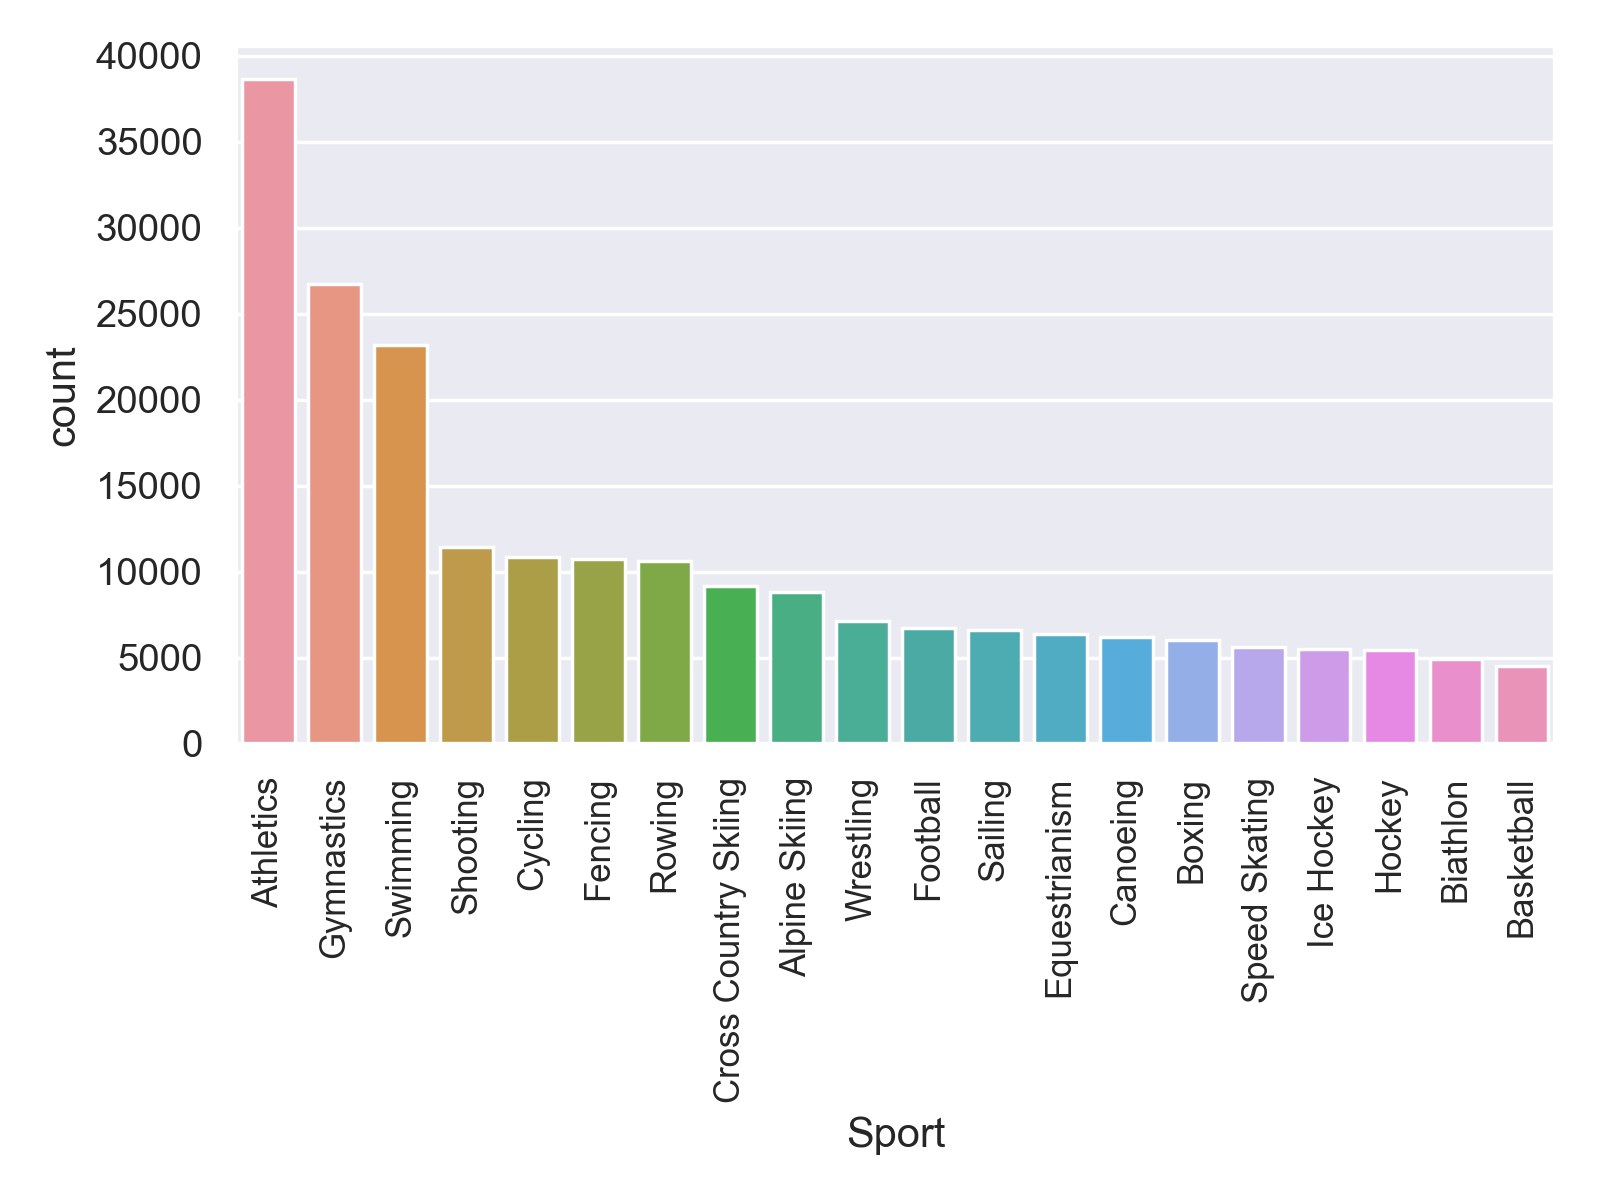

In [15]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=10, rotation=90)
sns.countplot(x='Sport', data=df_athletes, order=df_athletes['Sport'].value_counts()[:20].index)
plt.tight_layout()

In [16]:
df_athletes_last_10 = df_athletes[df_athletes['Year'] >= 2010]

<IPython.core.display.Javascript object>


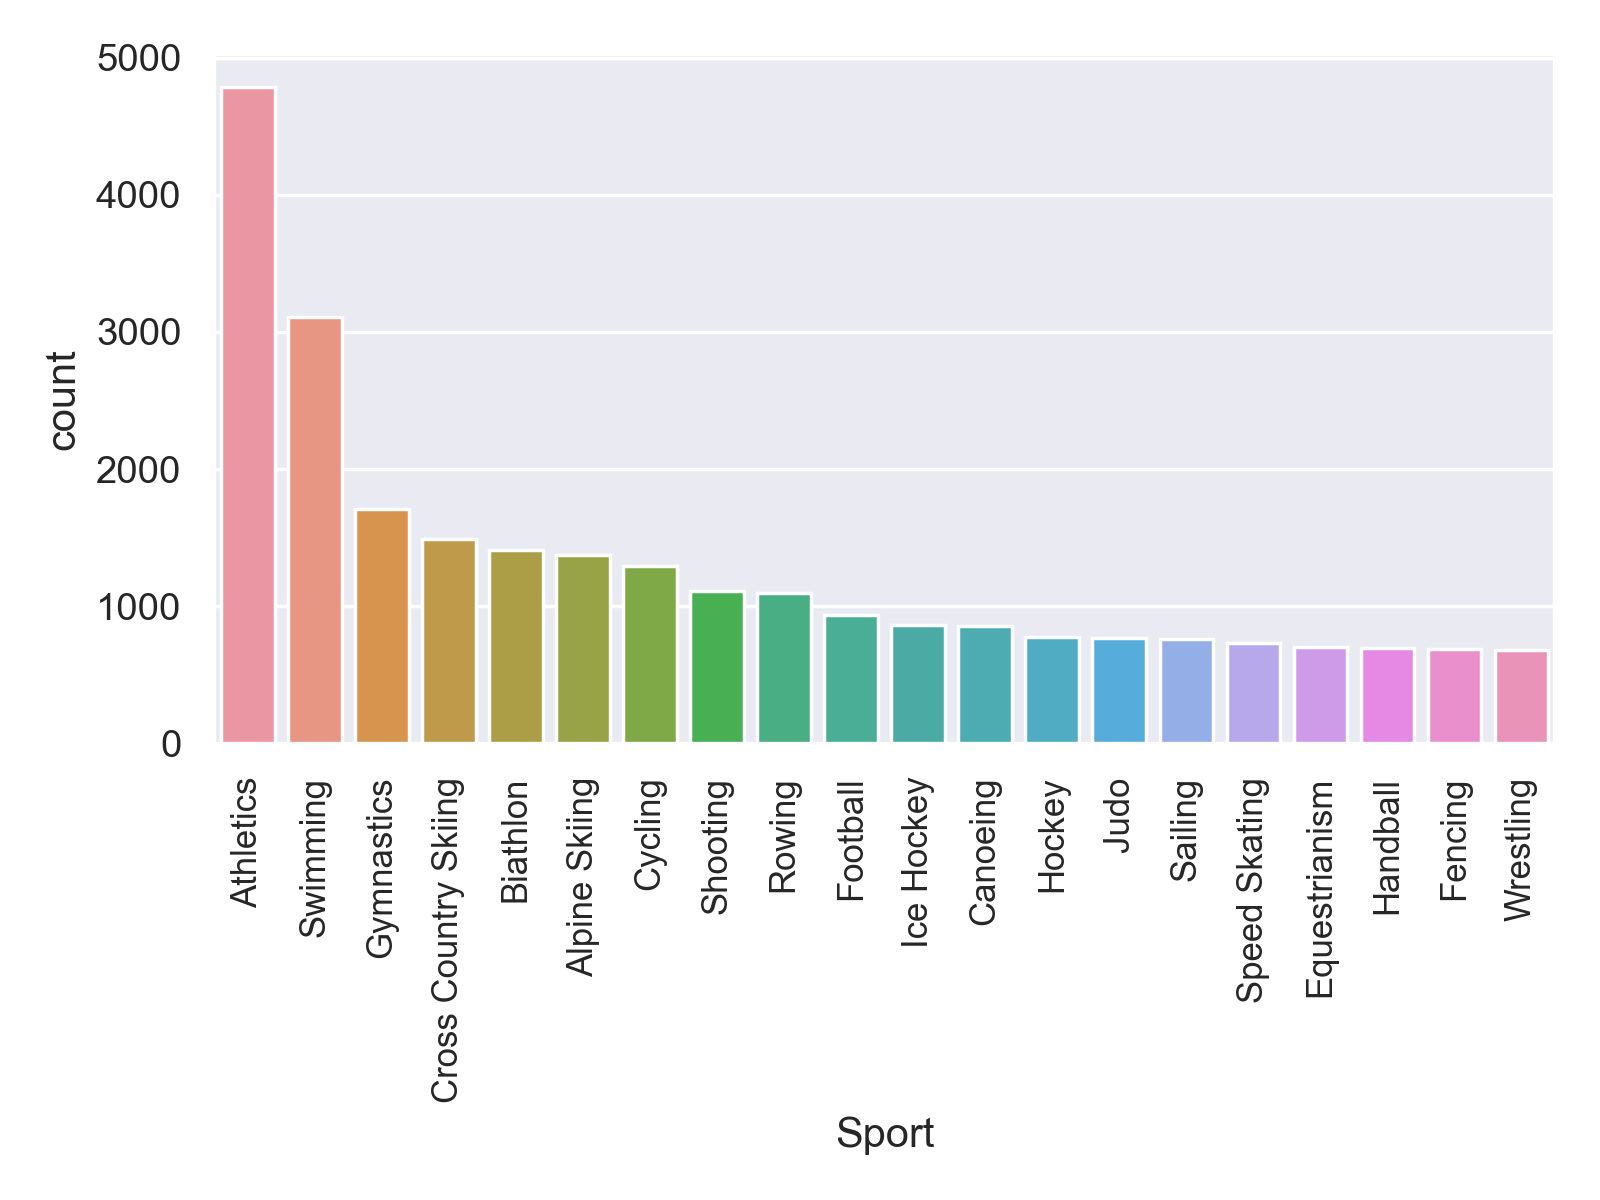

In [17]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=10, rotation=90)
sns.countplot(x='Sport', data=df_athletes_last_10, order=df_athletes_last_10['Sport'].value_counts()[:20].index)
plt.tight_layout()

In [18]:
# alternative mit groupby und aggregation per count() statt value_counts
df_athletes.groupby('Sport').count().sort_values(by='ID', ascending=False)['ID']

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: ID, Length: 66, dtype: int64

In [19]:
df_skiing = df_athletes[df_athletes['Sport'] == 'Alpine Skiing']

In [20]:
df_skiing['Year'].value_counts()

1992    750
2014    687
2010    685
1988    668
2006    619
2002    559
1994    544
1998    477
1968    422
1964    411
1956    403
1984    401
1976    390
1952    378
1948    360
1980    327
1972    325
1960    320
1936    103
Name: Year, dtype: int64

In [21]:
df_skiing

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
62,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270965,135500,Kristaps Zvejnieks,M,17.0,185.0,87.0,Latvia,LAT,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
270966,135500,Kristaps Zvejnieks,M,21.0,185.0,87.0,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
270967,135500,Kristaps Zvejnieks,M,21.0,185.0,87.0,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
271039,135540,David Zwilling,M,22.0,174.0,68.0,Austria,AUT,1972 Winter,1972,Winter,Sapporo,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN


<IPython.core.display.Javascript object>


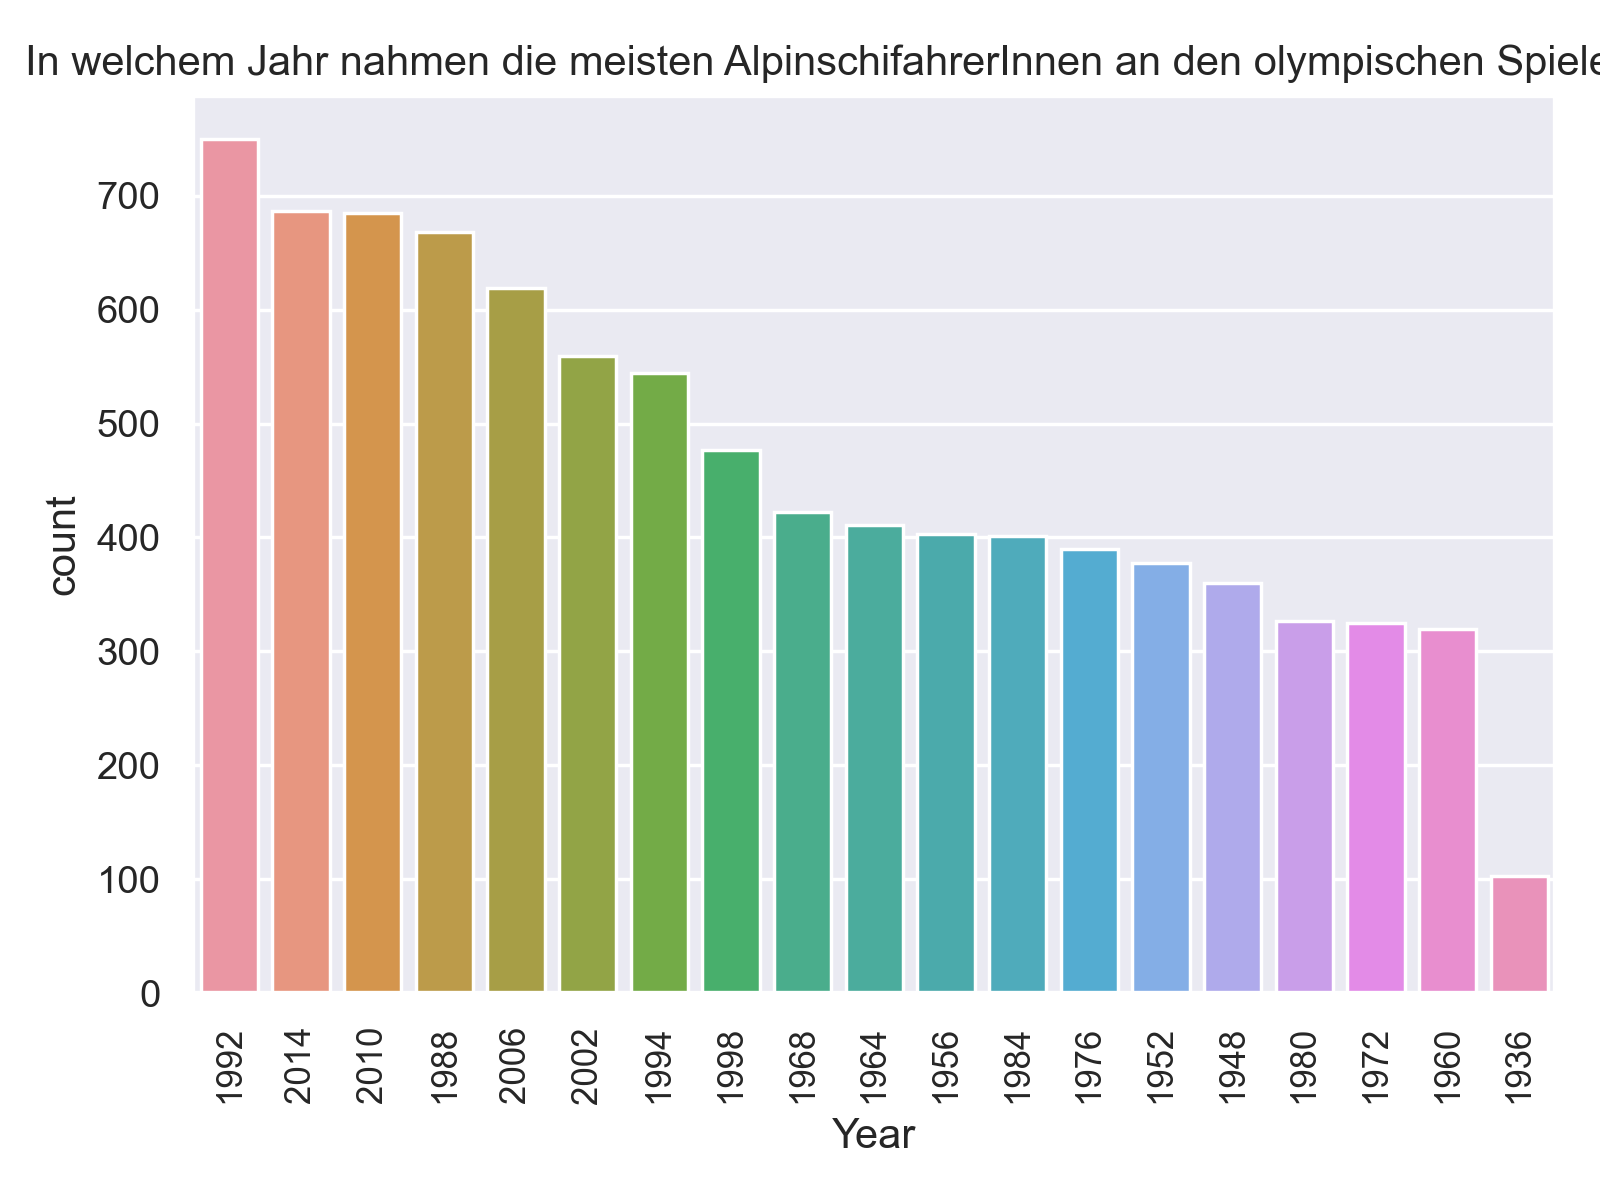

In [22]:
plt.figure()
plt.title("In welchem Jahr nahmen die meisten AlpinschifahrerInnen an den olympischen Spielen teil?")
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=10, rotation=90)
sns.countplot(x='Year', data=df_skiing, order=df_skiing['Year'].value_counts().index)
plt.tight_layout()

### Aufgabe 3:
Zeige die zehn schwersten sowie die zehn größten männlichen bzw. weiblichen Athletinnen.

Bonusplot: Erstelle einen Scatterplot von Größe vs. Gewicht für alle Athletinnen (coloriert nach Geschlecht!) eines beliebigen Landes dar.

In [23]:
unique_athletes = df_athletes.drop_duplicates(subset=['ID'])
unique_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135571 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      135571 non-null  int64  
 1   Name    135571 non-null  object 
 2   Sex     135571 non-null  object 
 3   Age     129203 non-null  float64
 4   Height  101655 non-null  float64
 5   Weight  100686 non-null  float64
 6   Team    135571 non-null  object 
 7   NOC     135571 non-null  object 
 8   Games   135571 non-null  object 
 9   Year    135571 non-null  int64  
 10  Season  135571 non-null  object 
 11  City    135571 non-null  object 
 12  Sport   135571 non-null  object 
 13  Event   135571 non-null  object 
 14  Medal   19151 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 16.5+ MB


In [24]:
unique_athletes = unique_athletes.dropna(subset=['Height', 'Weight'])
unique_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99587 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      99587 non-null  int64  
 1   Name    99587 non-null  object 
 2   Sex     99587 non-null  object 
 3   Age     99088 non-null  float64
 4   Height  99587 non-null  float64
 5   Weight  99587 non-null  float64
 6   Team    99587 non-null  object 
 7   NOC     99587 non-null  object 
 8   Games   99587 non-null  object 
 9   Year    99587 non-null  int64  
 10  Season  99587 non-null  object 
 11  City    99587 non-null  object 
 12  Sport   99587 non-null  object 
 13  Event   99587 non-null  object 
 14  Medal   13515 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 12.2+ MB


In [25]:
unique_athletes[unique_athletes['Sex'] == 'M'].sort_values(by='Weight', ascending=False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN
75031,38075,Marek Galiski,M,29.0,200.0,190.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
237039,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN
206352,103580,Valentyn Rusliakov,M,28.0,187.0,180.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Heavyweight,NaN
206004,103413,Leonel Wilfredo Ruz Carmona,M,29.0,187.0,178.0,Venezuela,VEN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN
94362,47755,"Marcus Jerrold ""Mark"" Henry",M,21.0,190.0,176.5,United States,USA,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN
173166,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
168480,84679,Illie Daniel Natea,M,24.0,203.0,170.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,NaN


In [26]:
df_athletes[df_athletes['Sex'] == 'M'].groupby(['Name'])['Weight'].max().sort_values(ascending=False)[:10]

Name
Ricardo Blas, Jr.                214.0
Aytami Ruano Vega                198.0
Marek Galiski                    190.0
Christopher J. "Chris" Taylor    182.0
Valentyn Rusliakov               180.0
Leonel Wilfredo Ruz Carmona      178.0
Marcus Jerrold "Mark" Henry      176.5
Dmitry Yuryevich Nosov           175.0
Janusz Wojnarowicz               170.0
Illie Daniel Natea               170.0
Name: Weight, dtype: float64

In [27]:
unique_athletes[unique_athletes['Sex'] == 'F'].sort_values(by='Weight', ascending=False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
124419,62843,Olha Vasylivna Korobka,F,18.0,181.0,167.0,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
196341,98570,Samah Ramadan Mohamed,F,26.0,186.0,163.0,Egypt,EGY,2004 Summer,2004,Summer,Athina,Judo,Judo Women's Heavyweight,NaN
148349,74435,Holley Mangold,F,22.0,173.0,155.0,United States,USA,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
147315,73935,Beata Elbieta Maksymowa,F,24.0,180.0,145.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Judo,Judo Women's Heavyweight,NaN
207555,104150,Urszula Sadkowska,F,24.0,193.0,145.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Heavyweight,NaN
202059,101488,Sarah Elizabeth Robles,F,23.0,178.0,141.0,United States,USA,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
118875,60174,Kim Na-Yeong,F,20.0,189.0,140.0,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Heavyweight,NaN
224887,112970,Reanna Maricha Solomon,F,22.0,165.0,136.0,Nauru,NRU,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
92366,46783,Cheryl Ann Haworth,F,17.0,175.0,136.0,United States,USA,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Women's Super-Heavyweight,Bronze
36304,18653,Michelle Denee Carter,F,22.0,176.0,136.0,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN


In [28]:
df_athletes[df_athletes['Sex'] == 'F'].groupby(['Name'])['Weight'].max().sort_values(ascending=False)[:10]

Name
Olha Vasylivna Korobka     167.0
Samah Ramadan Mohamed      163.0
Holley Mangold             155.0
Urszula Sadkowska          145.0
Beata Elbieta Maksymowa    145.0
Sarah Elizabeth Robles     141.0
Kim Na-Yeong               140.0
Reanna Maricha Solomon     136.0
Michelle Denee Carter      136.0
Cheryl Ann Haworth         136.0
Name: Weight, dtype: float64

In [29]:
unique_athletes[unique_athletes['Sex'] == 'M'].sort_values(by='Height', ascending=False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
269053,134621,Zhang Zhaoxu,M,24.0,221.0,110.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
240656,120589,Volodymyr Petrovych Tkachenko,M,18.0,220.0,110.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Bronze
141983,71228,"Lucien James ""Luc"" Longley",M,19.0,220.0,135.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN
166544,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Gold


In [30]:
df_athletes[df_athletes['Sex'] == 'M'].groupby(['Name'])['Height'].max().sort_values(ascending=False)[:10]

Name
Yao Ming                             226.0
Arvydas Romas Sabonis                223.0
Tommy Loren Burleson                 223.0
Zhang Zhaoxu                         221.0
Roberto Dueas Hernndez               221.0
Gunther Behnke                       221.0
Volodymyr Petrovych Tkachenko        220.0
Viktor Aleksandrovich Pankrashkin    220.0
Lucien James "Luc" Longley           220.0
Peter John Ramos Fuentes             219.0
Name: Height, dtype: float64

In [31]:
unique_athletes[unique_athletes['Sex'] == 'F'].sort_values(by='Height', ascending=False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60623,31045,"Magorzata Teresa ""Margo"" Dydek (-Twigg)",F,26.0,213.0,100.0,Poland,POL,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,NaN
216267,108551,Ujana Semjonova,F,24.0,210.0,128.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Women's Basketball,Gold
258204,129295,Wei Wei,F,22.0,206.0,90.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Women's Basketball,NaN
39497,20323,Chen Yuefang,F,21.0,205.0,104.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
269244,134728,Zheng Haixia,F,17.0,204.0,115.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
192074,96444,Olga Dmitriyevna Potashova,F,24.0,204.0,98.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Women's Volleyball,Silver
84720,42994,Brittney Yevette Griner,F,25.0,203.0,94.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,Gold
34144,17591,"Elizabeth Folake ""Liz"" Cambage",F,20.0,203.0,98.0,Australia,AUS,2012 Summer,2012,Summer,London,Basketball,Basketball Women's Basketball,Bronze
57434,29426,Anne Theresa Donovan,F,22.0,203.0,62.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Gold
234264,117488,Erzsbet Szentesi (Lszl-),F,26.0,203.0,80.0,Hungary,HUN,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,NaN


In [32]:
df_athletes[df_athletes['Sex'] == 'F'].groupby(['Name'])['Height'].max().sort_values(ascending=False)[:10]

Name
Magorzata Teresa "Margo" Dydek (-Twigg)    213.0
Ujana Semjonova                            210.0
Wei Wei                                    206.0
Chen Yuefang                               205.0
Susanna "Sue" Geh                          205.0
Olga Dmitriyevna Potashova                 204.0
Zheng Haixia                               204.0
Elizabeth Folake "Liz" Cambage             203.0
Erzsbet Szentesi (Lszl-)                   203.0
Brittney Yevette Griner                    203.0
Name: Height, dtype: float64

<IPython.core.display.Javascript object>


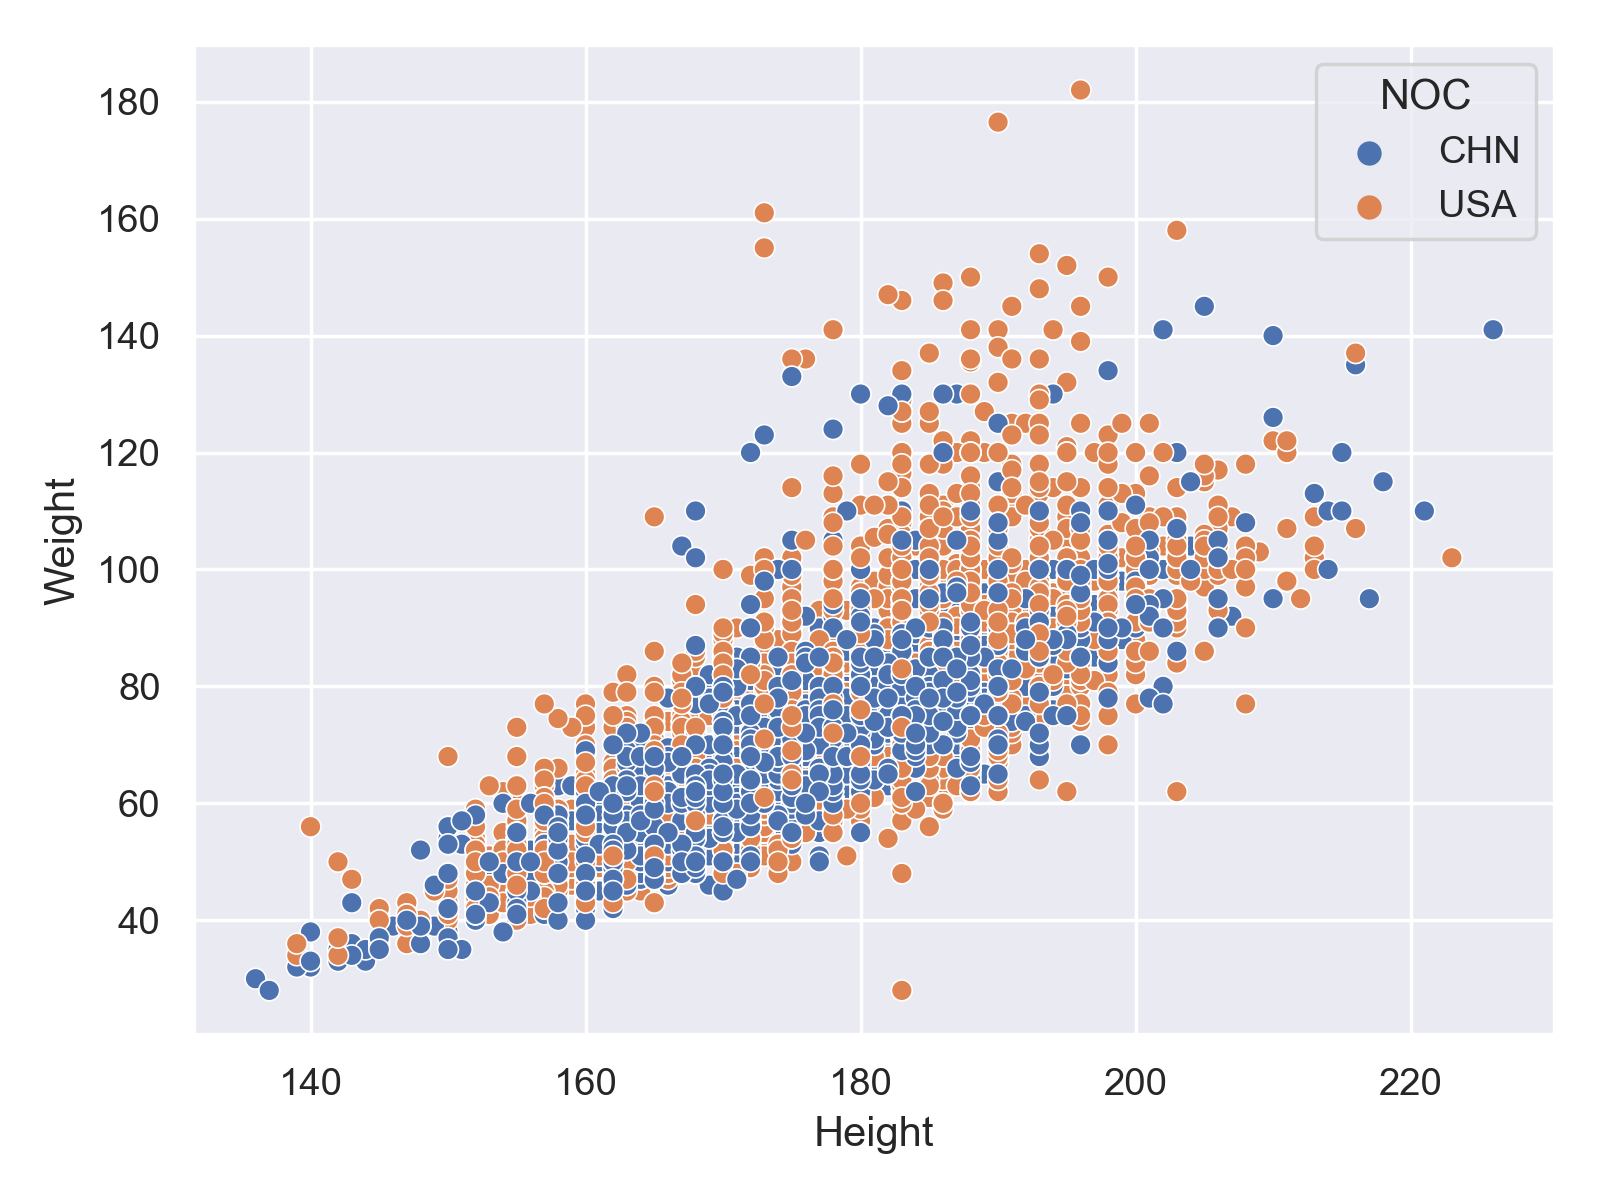

In [33]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.scatterplot(x='Height',
                y='Weight',
                data=unique_athletes[(unique_athletes['NOC'] == 'USA') | (unique_athletes['NOC'] == 'CHN')],
                hue='NOC')
plt.tight_layout()

In [34]:
unique_athletes[(unique_athletes['Height'] <= 140) & (unique_athletes['Weight'] <= 30)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
69215,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Individual All-Around,NaN
143275,71914,Lu Li,F,15.0,136.0,30.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Individual All-Around,NaN
163755,82193,Sara Moro de Faes,F,16.0,139.0,30.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,NaN
218188,109593,Liubov Sheremeta,F,16.0,136.0,30.0,Ukraine,UKR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Individual All-Around,NaN
256836,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Bronze


In [35]:
unique_athletes[unique_athletes['Sport'] == 'Gymnastics']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
437,244,Raouf Abdelraouf,M,22.0,167.0,63.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Men's Individual All-Around,NaN
676,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,NaN
687,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270430,135269,Zou Kai,M,20.0,158.0,55.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Individual All-Around,NaN
270457,135284,Jan Zoulk,M,19.0,162.0,61.0,Czechoslovakia,TCH,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Men's Individual All-Around,NaN
270482,135291,Roman Volodymyrovych Zozulia,M,21.0,164.0,59.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Men's Individual All-Around,NaN
270664,135363,Angelo Zucca,M,20.0,167.0,63.0,Italy,ITA,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Men's Individual All-Around,NaN


<IPython.core.display.Javascript object>


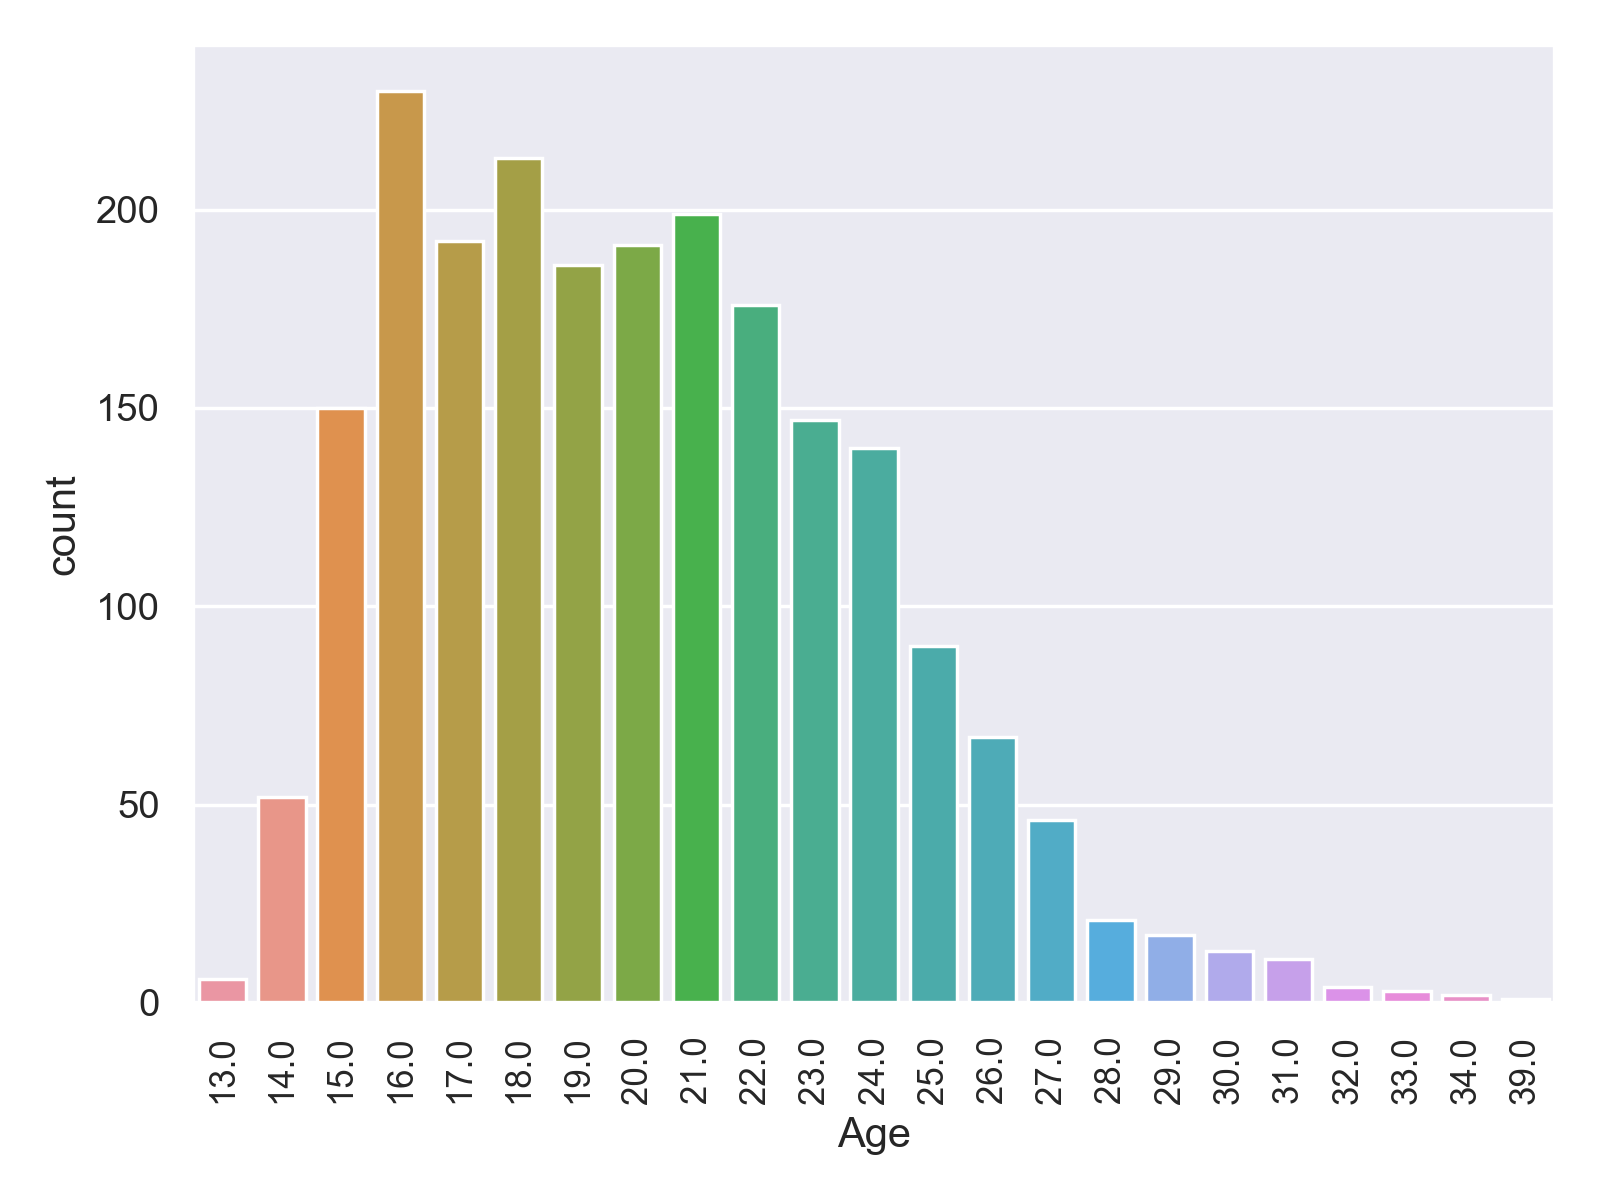

In [36]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=10, rotation=90)
sns.countplot(x='Age', data=unique_athletes[unique_athletes['Sport'] == 'Gymnastics'])
plt.tight_layout()

### Aufgabe 4:
Wieviele unterschiedliche Bewerbe wurden erfasst?

Bonusplot: Wie ist das Verhältnis unterschiedlicher Bewerbe bei Sommerspielen zu Winterspielen?

In [37]:
unique_events = df_athletes.sort_values(by='Year').drop_duplicates(subset=['Event'])

In [38]:
unique_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148812,74635,Huriana Manuel,F,29.0,166.0,65.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Silver
57840,29618,Sara Dosho,F,21.0,159.0,69.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Light-Heavyweight, Freestyle",Gold
189128,95002,Ben Pinkelman,M,22.0,193.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Men's Rugby Sevens,NaN
221424,111288,Nataliya Siniin,F,31.0,160.0,58.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Featherweight, Freestyle",Bronze


<IPython.core.display.Javascript object>


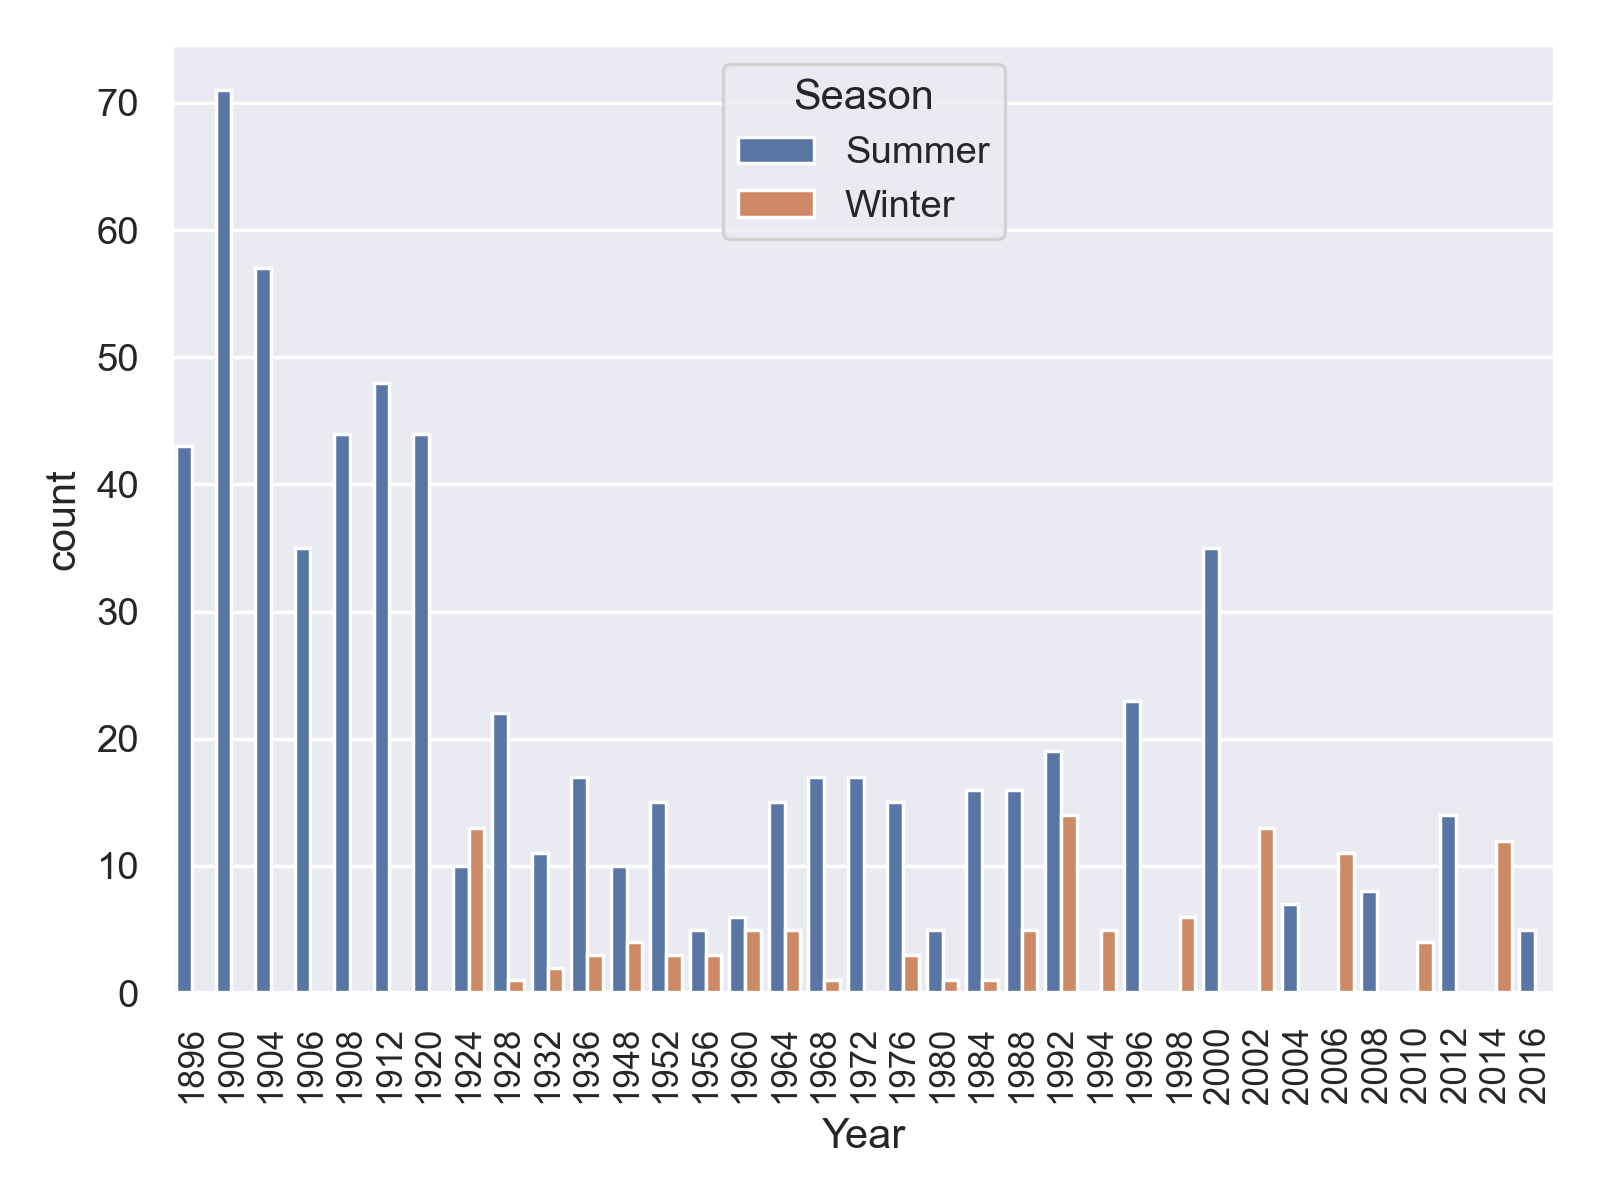

In [39]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=10, rotation=90)
sns.countplot(x='Year', data=unique_events, hue='Season')
plt.tight_layout()

### Aufgabe 5:
Wieviele weibliche Athletinnen nahmen bisher an den olympischen Spielen teil?

Bonusplot: Hat sich die Anzahl der Teilnehmerinnen olympischer Spiele über die Jahre erhöht?

In [40]:
unique_athletes = df_athletes.drop_duplicates(subset='ID')

In [41]:
unique_women = unique_athletes[unique_athletes['Sex'] == 'F']
unique_women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
34,14,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Women's 7.5 kilometres Sprint,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


<IPython.core.display.Javascript object>


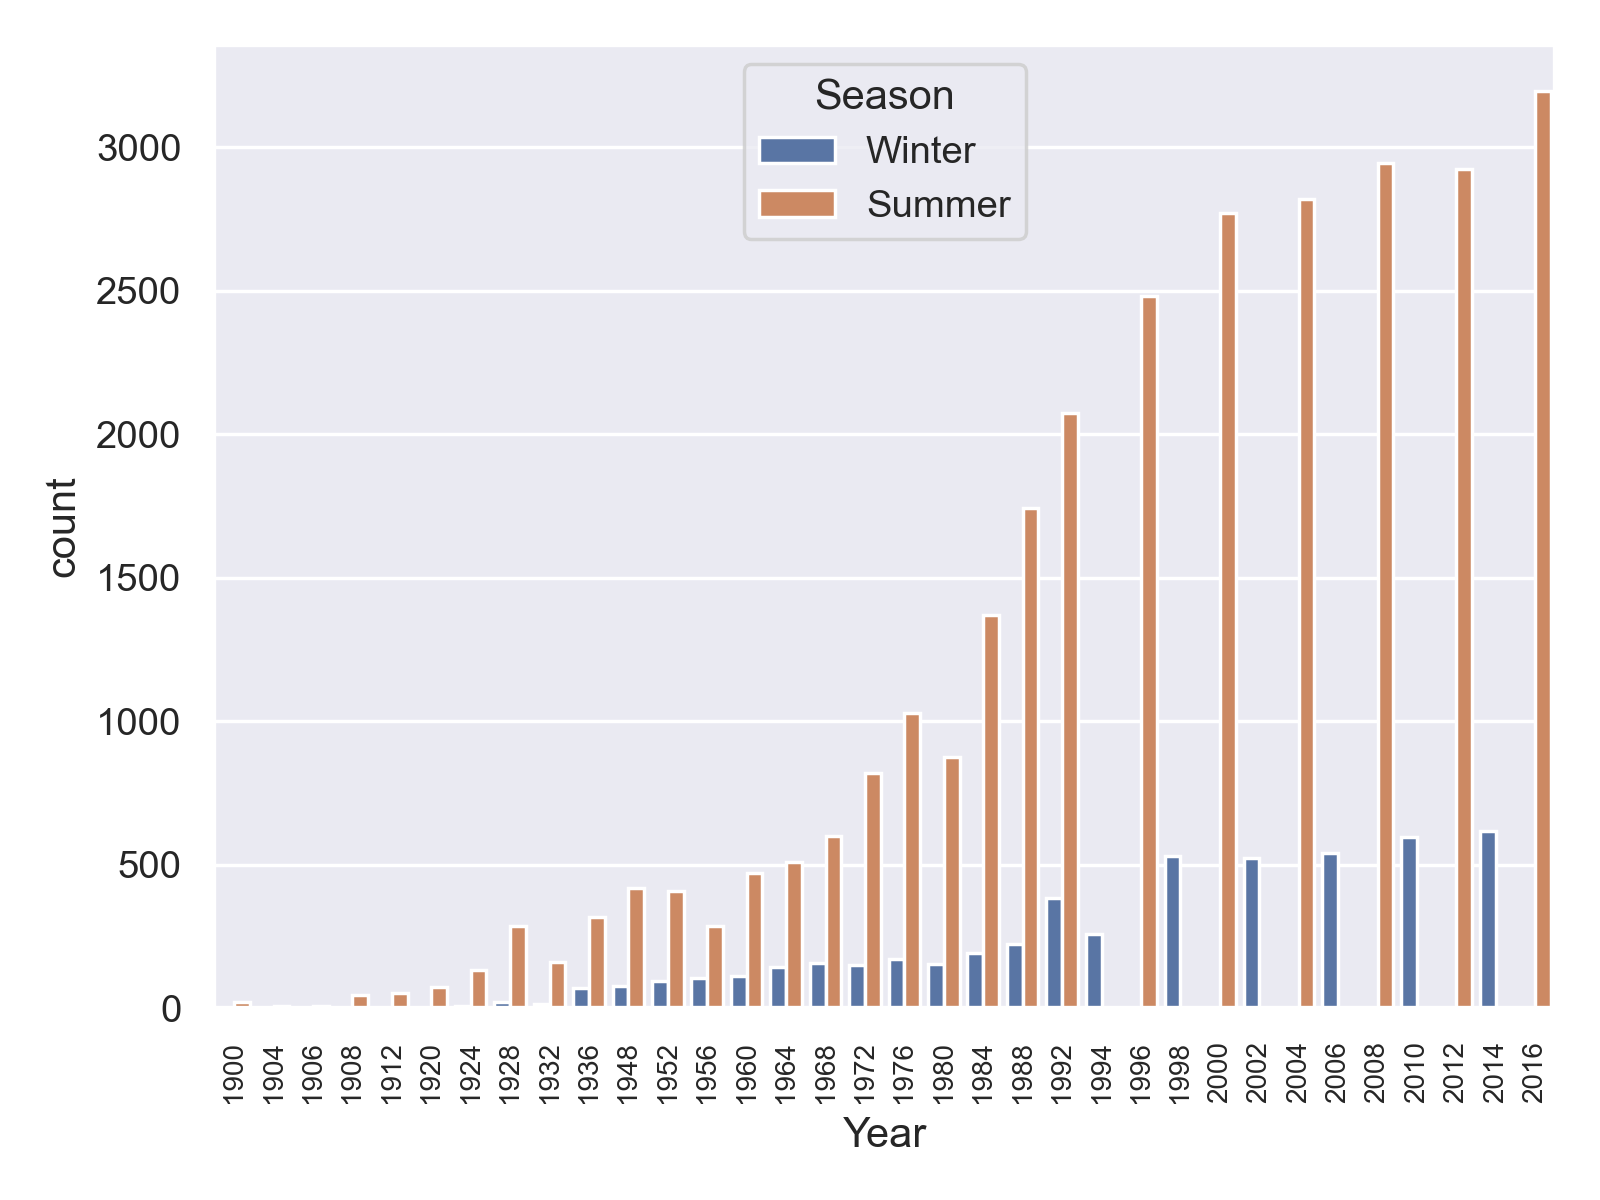

In [42]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.countplot(data=unique_women, x="Year", hue='Season')
plt.tick_params(axis='x', labelsize=8, rotation=90)
plt.tight_layout()

### Aufgabe 6:
Wieviele männliche Athleten nahmen bisher an den olympischen Spielen teil?

Bonusplot: Wie sieht's mit der Anzahl der Teilnehmer olympischer Spiele über die Jahre aus?

In [43]:
unique_athletes = df_athletes.drop_duplicates(subset='ID')

In [44]:
unique_men = unique_athletes[unique_athletes['Sex'] == 'M']
unique_men.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


<IPython.core.display.Javascript object>


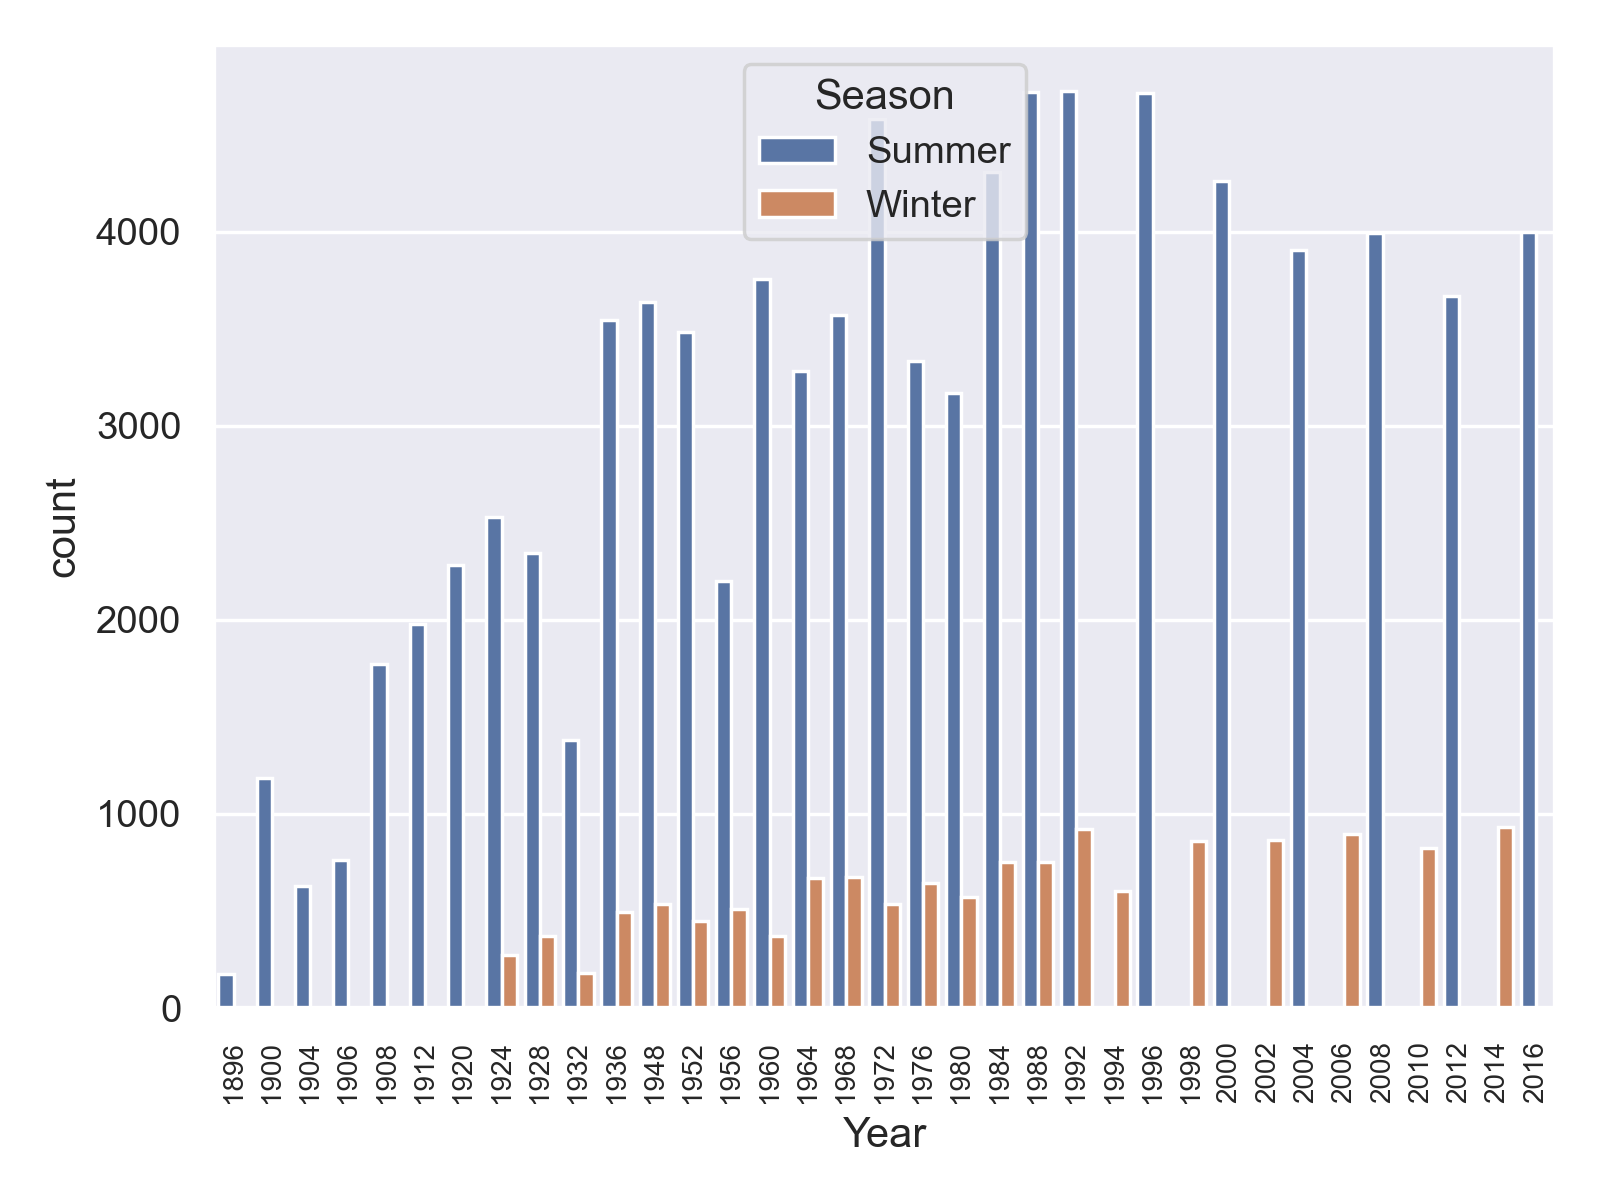

In [45]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.countplot(data=unique_men, x="Year", hue='Season')
plt.tick_params(axis='x', labelsize=8, rotation=90)
plt.tight_layout()

### Aufgabe 7:
Wieviele Länder haben  Athletinnen zu den olympischen Spielen geschickt?

In [46]:
df_athletes = df_athletes.merge(df_regions[['NOC', 'region']], on='NOC')

In [50]:
df_athletes['region'].dropna().value_counts()

USA            18853
Germany        15883
France         12758
UK             12256
Russia         11692
               ...  
Kiribati          11
Brunei            10
Timor-Leste        9
Kosovo             8
South Sudan        3
Name: region, Length: 205, dtype: int64

In [51]:
len(df_athletes['region'].dropna().unique())

205

### Aufgabe 8:
Wieviele unterschiedliche Austragungsorte sind eingetragen?

In [52]:
df_athletes['City'].value_counts()

London                    22389
Athina                    15534
Sydney                    13798
Atlanta                   13745
Rio de Janeiro            13656
Beijing                   13566
Barcelona                 12940
Los Angeles               12409
Seoul                     12010
Munich                    10292
Montreal                   8637
Mexico City                8582
Helsinki                   8263
Roma                       8114
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4777
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [53]:
len(df_athletes['City'].unique())

42

### Aufgabe 9:
Wieviele Athletinnen haben zumindest eine Medaille gewonnen?

Bonusplot: Stelle die Verteilung der Größe und des Gewichts von Medaillengewinnerinnen in unterschiedlichen Sportarten als Boxplot dar.

In [65]:
winning_athletes = df_athletes.dropna(subset=['Medal']).drop_duplicates(subset=['ID'])
winning_athletes['Name']

8                  An Yulong
12               An Zhongxin
17                    Ba Yan
33              Bao Yingying
41                Bi Wenjing
                 ...        
270334    Francine Niyonsaba
270486          Hong Anh Tun
270492         Hong Xun Vinh
270596           Trn Hiu Ngn
270693     Majlinda Kelmendi
Name: Name, Length: 28246, dtype: object

In [66]:
len(winning_athletes)

28246

In [69]:
winning_athletes = df_athletes.dropna(subset=['Medal'])

winning_athletes = winning_athletes.dropna(subset=['Height', 'Weight'])

# für die sortierung der größe nach median:
height_by_median = winning_athletes.groupby(by=["Sport"])["Height"].median().sort_values(ascending=False).index

# für die sortierung des gewichts nach median:
weight_by_median = winning_athletes.groupby(by=["Sport"])["Weight"].median().sort_values(ascending=False).index

<IPython.core.display.Javascript object>


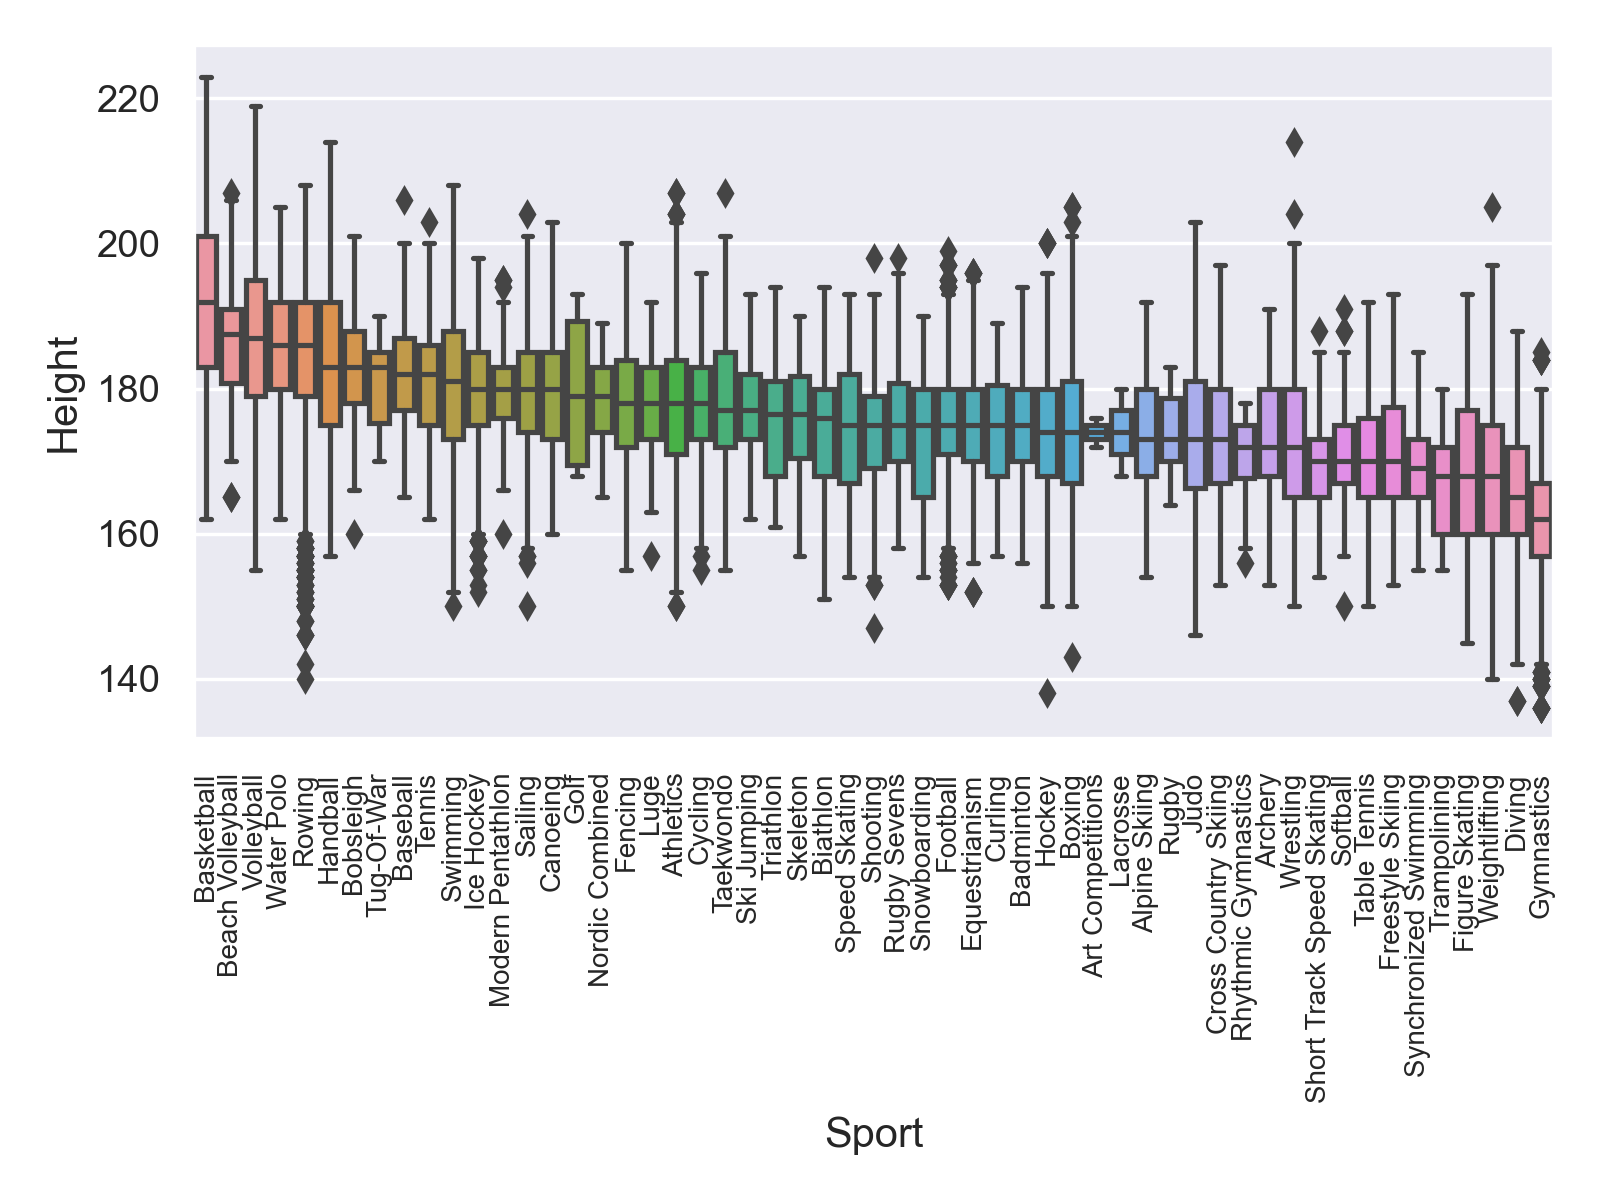

In [68]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.boxplot(data=winning_athletes, x="Sport", y='Height',
           
           order=height_by_median)
plt.tick_params(axis='x', labelsize=8, rotation=90)
plt.tight_layout()

<IPython.core.display.Javascript object>


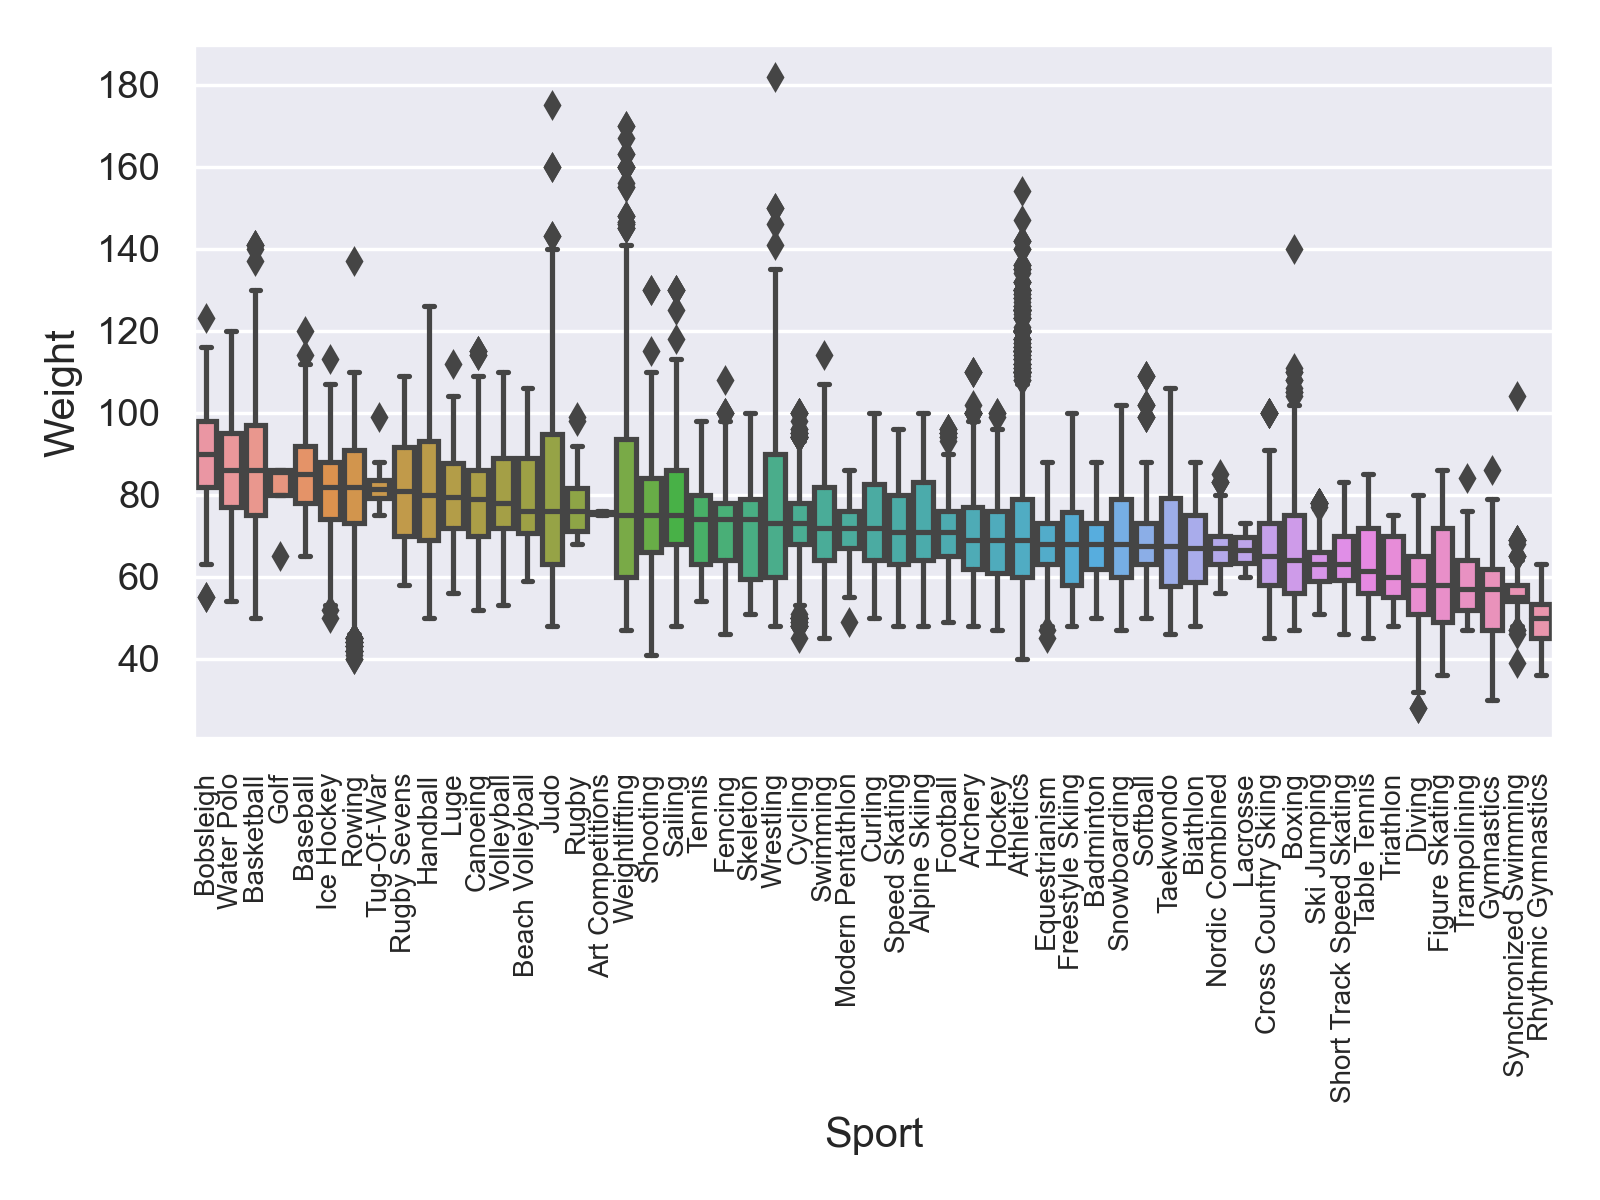

In [70]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.boxplot(data=winning_athletes, x="Sport", y='Weight',
           
           order=weight_by_median)
plt.tick_params(axis='x', labelsize=8, rotation=90)
plt.tight_layout()

### Aufgabe 10:
Welche Athletin hat die meisten Medaillen gewonnen?

Bonus: Zeige die Anzahl jener Athletinnen, die mehr als eine Medaille gewonnen haben.

In [83]:
medalling_athletes = df_athletes.dropna(subset=['Medal'])['ID'].value_counts().rename_axis('ID').reset_index(name='MedalCount')

In [88]:
medals_won = medalling_athletes.merge(df_athletes[['Name', 'Sex', 'NOC', 'ID', 'Height', 'Weight', 'Sport']], on='ID')

medals_won = medals_won.drop_duplicates(subset=['ID'])

medals_won.head(1)

,ID,MedalCount,Name,Sex,NOC,Height,Weight,Sport
0,94406,28,"Michael Fred Phelps, II",M,USA,193.0,91.0,Swimming


In [89]:
medals_won[medals_won['MedalCount'] > 1]

,ID,MedalCount,Name,Sex,NOC,Height,Weight,Sport
0,94406,28,"Michael Fred Phelps, II",M,USA,193.0,91.0,Swimming
30,67046,18,Larysa Semenivna Latynina (Diriy-),F,URS,161.0,52.0,Gymnastics
49,4198,15,Nikolay Yefimovich Andrianov,M,URS,166.0,60.0,Gymnastics
73,11951,13,Ole Einar Bjrndalen,M,NOR,178.0,65.0,Biathlon
100,109161,13,Borys Anfiyanovych Shakhlin,M,URS,171.0,71.0,Gymnastics
...,...,...,...,...,...,...,...,...
32661,71047,2,"Hermanus Pieter ""Dick"" Loggere",M,NED,NaN,NaN,Hockey
32663,80682,2,"Allison Jaime ""A. J."" Mleczko (-Griswold)",F,USA,180.0,73.0,Ice Hockey
32665,13303,2,"Petronella Theodora Maria ""Ellen"" Bontje",F,NED,178.0,72.0,Equestrianism
32671,85535,2,David Neville,M,USA,193.0,77.0,Athletics
